# Training_BinaryCase


**Paper:** Bioacoustic classification of Hainan Gibbon call types using Deep Learning

**Code Date:** April 2022

**Repository:** https://github.com/shelovescode000/Automated-classification-of-Hainan-Gibbon-call-types-using-deep-learning

**Notebook description:** Train a CNN on the augmented spectrogram images.

<hr>

**Note 1: Code was adapted from https://github.com/emmanueldufourq/GibbonClassifier.**


<hr>



In [ ]:
#I created a train binary case for the binary model.

In [1]:
from Train_Helper_Binary import *

## Parameters

In [2]:
audio_directory = 'Raw_Data/Train/'
timestamp_directory = 'Call_Labels/'
save_location = 'Pickled_Data/'
augment_directory = 'Augmented_Data/'
augment_image_directory = 'Augmented_Image_Data/'
training_file = 'Training_Files.txt'

audio_directory_validation = 'Raw_Data/Validation/'
timestamp_directory_validation = 'Call_Labels_Validation/'
save_location_validation = 'Pickled_Data_Validation/'
augment_directory_validation = 'Augmented_Data_Validation/'
augment_image_directory_validation = 'Augmented_Image_Data_Validation/'
validation_file = 'Validation_Files.txt'

audio_directory_testing = 'Raw_Data/Test/'
timestamp_directory_testing = 'Call_Labels_Testing/'
save_location_testing = 'Pickled_Data_Testing/'
augment_directory_testing = 'Images_Testing/'
augment_image_directory_testing = 'Images_Testing2/'
testing_file = 'Testing_Files.txt'

sample_rate = 4800
number_seconds_to_extract = 10
seed = 42
number_iterations = 1
augmentation_probability = 1.0
augmentation_amount_noise = 2
augmentation_amount_gibbon = 10

sample_rate = 4800
number_seconds_to_extract = 10
seed = 42
number_iterations = 1
augmentation_probability = 1.0
augmentation_amount_noise = 2
augmentation_amount_gibbon = 10

## Extract segments, preprocessing and augment all training files

In [ ]:
execute_preprocessing_all_files(training_file, audio_directory, 
                            sample_rate, timestamp_directory,
                         
                                number_seconds_to_extract, save_location,
                            augmentation_amount_noise, augmentation_probability, 
                            augmentation_amount_gibbon, seed, augment_directory, augment_image_directory,
                            number_iterations)  

## Begin training

In [3]:
from sklearn.utils import shuffle

In [4]:
    print('Loading data...')
    training_files = []
    validation_files = []
    gibbon_X,non_gibbon_X = load_training_images(augment_image_directory, training_file)
    gibbon_X_v,non_gibbon_X_v = load_training_images(augment_image_directory_validation, validation_file)
    
    print()
    print ('Data loaded.')
    print ('Processing...')
    X_train, Y_train = prepare_X_and_Y(gibbon_X,non_gibbon_X)
    del gibbon_X, non_gibbon_X
    X_val, Y_val = prepare_X_and_Y(gibbon_X_v,non_gibbon_X_v)
    del gibbon_X_v, non_gibbon_X_v    
    print ('Processing done.')
    print()
    print ('Shape of X', X_train.shape)
    print ('Shape of Y', Y_train.shape) #3310 #796  #38
    print ('Shape of X', X_val.shape)
    print ('Shape of Y', Y_val.shape)

Loading data...

----------------------------------
Reading file: HGSM3C_0+1_20150806_052100.wav
Reading file gibbon augmented file:  HGSM3C_0+1_20150806_052100
Reading non-gibbon augmented file: HGSM3C_0+1_20150806_052100

----------------------------------
Reading file: HGSM3C_0+1_20150807_052200.wav
Reading file gibbon augmented file:  HGSM3C_0+1_20150807_052200
Reading non-gibbon augmented file: HGSM3C_0+1_20150807_052200

----------------------------------
Reading file: HGSM3C_0+1_20150811_052300.wav
Reading file gibbon augmented file:  HGSM3C_0+1_20150811_052300
Reading non-gibbon augmented file: HGSM3C_0+1_20150811_052300

----------------------------------
Reading file: HGSM3C_0+1_20160501_051500.wav
Reading file gibbon augmented file:  HGSM3C_0+1_20160501_051500
Reading non-gibbon augmented file: HGSM3C_0+1_20160501_051500

----------------------------------
Reading file: HGSM3C_0+1_20160517_050800.wav
Reading file gibbon augmented file:  HGSM3C_0+1_20160517_050800
Reading non

In [5]:
seed = 2022
        
for experiment_id in range(0,number_iterations):

        print('Iteration {} starting...'.format(experiment_id))

        print ('experiment_id: {}'.format(experiment_id))

        
        #X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.20, 
        #                                                    random_state=seed, shuffle = True)
        X_train, Y_train = shuffle(X_train,Y_train)
        X_val, Y_val = shuffle(X_val,Y_val)
        
        # Check shape
        print ('X_train:',X_train.shape)
        print ('Y_train:',Y_train.shape)
        print ()
        print ('X_val:',X_val.shape)
        print ('Y_val:',Y_val.shape)

        # Call backs to save weights
        filepath= "Experiments/weights_{}.hdf5".format(seed)
        checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy',verbose=1, save_best_only=True, mode='max')
        #callbacks_list = [checkpoint]
        
        model = network()
        model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
        
        model.summary()
        
        start = time.time()

        history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), 
                  batch_size=32,
                  epochs=20,
                  verbose=2, 
                  callbacks=[checkpoint]) 
                  #class_weight={0:1.,1:1.}
        end = time.time()
        
        model.load_weights("Experiments/weights_{}.hdf5".format(seed))
        
        train_acc = accuracy_score(np.argmax(model.predict(X_train),1),np.argmax(Y_train,1))
        print("training accuracy = ",train_acc)

        val_acc = accuracy_score(np.argmax(model.predict(X_val),1), np.argmax(Y_val,1))
        print("validation accuracy = ",val_acc)

        

Iteration 0 starting...
experiment_id: 0
X_train: (45240, 128, 188, 1)
Y_train: (45240, 2)

X_val: (15080, 128, 188, 1)
Y_val: (15080, 2)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 113, 173, 8)       2056      
                                                                 
 dropout (Dropout)           (None, 113, 173, 8)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 43, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 28, 8)         16392     
                                                                 
 dropout_1 (Dropout)         (None, 13, 28, 8)         0         
                                                  

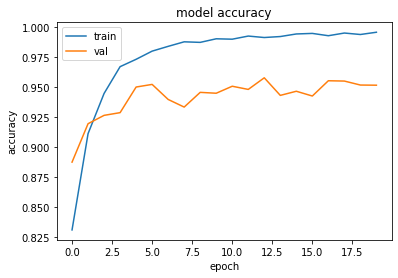

In [6]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

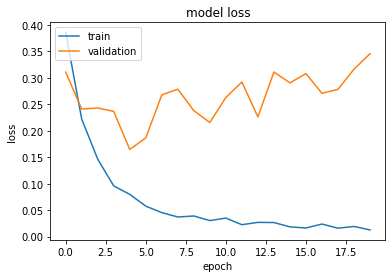

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# hyperparameter optimization
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

# optimize model 
start = time.time()

# create model
model = KerasClassifier(build_fn=network, verbose=1)

# define parameters and values for grid search 
param_grid = {
    'drop_out': [0.0,0.2,0.4],
    'batch_size': [8,16],    
    'epochs': [7],
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=2)
grid_result = grid.fit(X_train, to_categorical(Y_train))

# summarize results
print('time for grid search = {:.0f} sec'.format(time.time()-start))
display_cv_results(grid_result)

In [22]:
#Model metrics
print('Model 1:')
print("training accuracy = ",train_acc1)
print("validation accuracy = ",val_acc1)
print('Model 2:')
print("training accuracy = ",train_acc2)
print("validation accuracy = ",val_acc2)
print('Model 3:')
print("training accuracy = ",train_acc3)
print("validation accuracy = ",val_acc3)
print('Model 4:')
print("training accuracy = ",train_acc4)
print("validation accuracy = ",val_acc4)
print('Model 5:')
print("training accuracy = ",train_acc5)
print("validation accuracy = ",val_acc5)
print('Model 6:')
print("training accuracy = ",train_acc6)
print("validation accuracy = ",val_acc6)

Model 1:
training accuracy =  0.9987179487179487
validation accuracy =  0.9701591511936339
Model 2:
training accuracy =  0.9842617152961981
validation accuracy =  0.9436339522546419
Model 3:
training accuracy =  0.9667771883289125
validation accuracy =  0.9679045092838197
Model 4:
training accuracy =  0.983554376657825
validation accuracy =  0.9618700265251989
Model 5:
training accuracy =  0.9923076923076923
validation accuracy =  0.929973474801061
Model 6:
training accuracy =  0.990340406719717
validation accuracy =  0.931763925729443


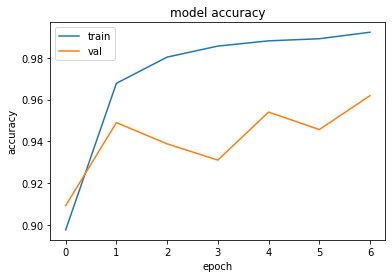

In [20]:
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

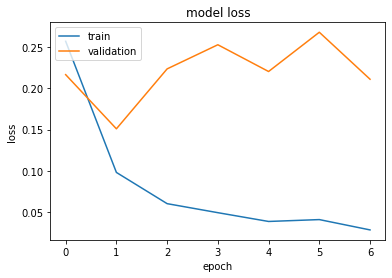

In [21]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [12]:
gibbon_X_test,non_gibbon_X_test = load_training_images(augment_directory_testing, testing_file)
Y_gibbon = np.ones(len(gibbon_X_test))*1
Y_noise = np.zeros(len(non_gibbon_X_test))
X_test = np.concatenate([gibbon_X_test,non_gibbon_X_test])
#del gibbon_XB, gibbon_XC, gibbon_XD, non_gibbon_X
Y = np.concatenate([Y_gibbon,Y_noise])
#del YB_gibbon,YC_gibbon,YD_gibbon,Y_noise
Y_test  = to_categorical(Y)


----------------------------------
Reading file: HGSM3A_0+1_20160316_055100.wav
Reading file gibbon augmented file:  HGSM3A_0+1_20160316_055100

----------------------------------
Reading file: HGSM3B_0+1_20150920_053200.wav
Reading file gibbon augmented file:  HGSM3B_0+1_20150920_053200

----------------------------------
Reading file: HGSM3B_0+1_20150923_053200.wav
Reading file gibbon augmented file:  HGSM3B_0+1_20150923_053200

----------------------------------
Reading file: HGSM3A_0+1_20150625_050700.wav
Reading file gibbon augmented file:  HGSM3A_0+1_20150625_050700

----------------------------------
Reading file: HGSM3A_0+1_20160317_055000.wav
Reading file gibbon augmented file:  HGSM3A_0+1_20160317_055000

----------------------------------
Reading file: HGSM3D_0+1_20160404_053500.wav
Reading file gibbon augmented file:  HGSM3D_0+1_20160404_053500

----------------------------------
Reading file: HGSM3B_0+1_20150803_052000.wav
Reading file gibbon augmented file:  HGSM3B_0+1_2

training accuracy =  0.983554376657825
validation accuracy =  0.9618700265251989
testing accuracy =  0.8834355828220859

Plotting performance on test data.
Normalized confusion matrix
[[0.9  0.1 ]
 [0.14 0.86]]


<Figure size 432x288 with 0 Axes>

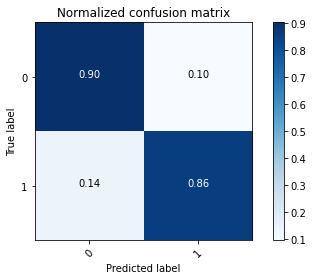

In [24]:

print("training accuracy = ",train_acc4)

print("validation accuracy = ",val_acc4)

test_acc = accuracy_score(np.argmax(model4.predict(X_test),1), np.argmax(Y_test,1))
print("testing accuracy = ",test_acc)

# _Compute confusion matrix
cnf_matrix = confusion_matrix(np.argmax(Y_test,1), np.argmax(model4.predict(X_test),1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names=['0','1']

print ()
print ('Plotting performance on test data.')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                        title='Normalized confusion matrix')

#percision and recall. add more matric...

plt.show()

In [31]:
from sklearn.metrics import classification_report
print('\nClassification Report\n') 
print(classification_report(np.argmax(Y_test,1),np.argmax(model4.predict(X_test),1), target_names=['Class 0','Class 1']))



Classification Report

              precision    recall  f1-score   support

     Class 0       0.89      0.90      0.90      1255
     Class 1       0.88      0.86      0.87      1027

    accuracy                           0.88      2282
   macro avg       0.88      0.88      0.88      2282
weighted avg       0.88      0.88      0.88      2282

